<a href="https://colab.research.google.com/github/prithiba-A/Mini-Project-43-Using_ResNet_for_Image_Classification/blob/main/Mini_Project_43_Using_ResNet_for_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from keras.applications import ResNet50
%matplotlib inline
import os
from PIL import Image
from tensorflow.keras.utils import plot_model
import warnings

warnings.filterwarnings("ignore")

In [ ]:
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

In [ ]:
import os

In [ ]:
folder_path = '"D:\Adroid_Connectz\animals"'

In [ ]:
print('Total cats images:', len(r"D:\Adroid_Connectz\animals\cats"))
print('Total dogs images:', len(r"D:\Adroid_Connectz\animals\dogs"))
print('Total pandas images:', len(r"D:\Adroid_Connectz\animals\panda"))

Total cats images: 31
Total dogs images: 31
Total pandas images: 32


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

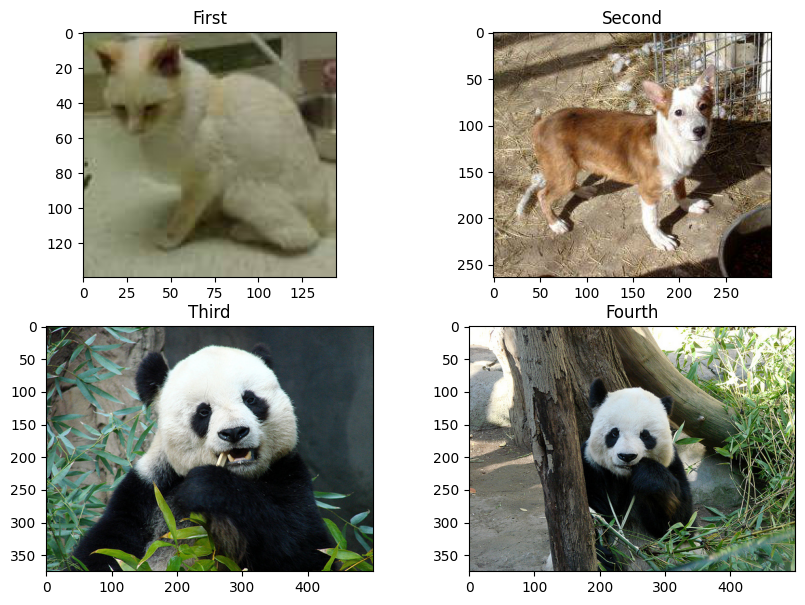

In [ ]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2

Image1 = Image.open('/content/cats_00011.jpg')
Image2 = Image.open('/content/dogs_00011.jpg')
Image3 = Image.open('/content/panda_00101.jpg')
Image4 = Image.open('/content/panda_00203.jpg')

fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.title("First")

fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.title("Second")

fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.title("Third")

fig.add_subplot(rows, columns, 4)
plt.imshow(Image4)
plt.title("Fourth")

plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    ResNet50(input_shape=(108, 108, 3), include_top=False),
])
for layer in model.layers:
    layer.trainable = False

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 64)          1179712   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

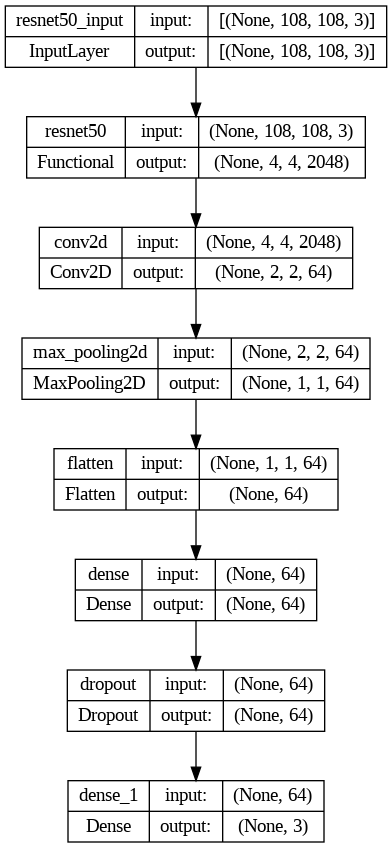

In [ ]:
# Visualize the model
plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)